In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('nnl1_metrics_flickrdata_2.csv').drop(['model', 'delta', 'time'], axis=1)
data = df.to_numpy()

In [26]:
df

,mse,psnr,ssim_scores,lpips,lambda
0,0.019072,17.196068,0.700642,0.452831,3.000000e-08
1,0.019072,17.196066,0.700641,0.452833,7.000000e-08
2,0.019072,17.196066,0.700641,0.452834,3.000000e-07
3,0.019072,17.196066,0.700641,0.452834,7.000000e-07
4,0.019072,17.196066,0.700641,0.452834,3.000000e-06
...,...,...,...,...,...
155,0.014646,18.342892,0.638173,0.522848,7.000000e-03
156,0.014646,18.342892,0.638173,0.522848,3.000000e-02
157,0.014646,18.342892,0.638173,0.522848,7.000000e-02
158,0.014646,18.342892,0.638173,0.522848,3.000000e-01


In [27]:
mmets = np.vstack([np.mean(data[np.where(data[:-1] == val), :][0], axis=0) for val in sorted(list(set(data[:,-1])))])

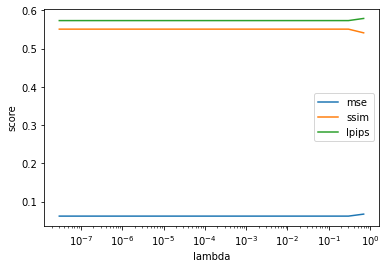

In [28]:
plt.plot(mmets[:,-1], mmets[:,0], label='mse')
plt.plot(mmets[:,-1], mmets[:,2], label='ssim')
plt.plot(mmets[:,-1], mmets[:,3], label='lpips')
plt.ylabel('score')
plt.xlabel('lambda')
plt.xscale('log', base=10)
plt.legend()
plt.savefig('nnl1_metrics.png')

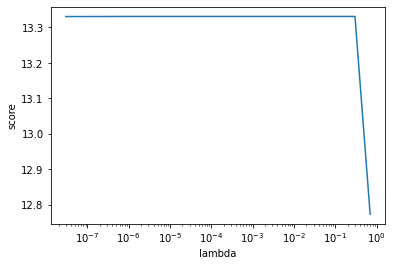

In [29]:
plt.plot(mmets[:,-1], mmets[:,1], label='psnr')
plt.ylabel('score')
plt.xlabel('lambda')
plt.xscale('log', base=10)
plt.savefig('nnl1_psnr.png')

In [30]:
all_df = pd.read_csv('../metricsdata/nnl1_metrics_all_flickrdata_2.csv')

In [12]:
all_df

,mse,psnr,ssim,lpips,time,model,lambda,delta
0,0.051138,12.912541,0.539611,0.544299,88.355486,nnL1,0.0001,0
1,0.023160,16.352661,0.753115,0.399447,73.081968,nnL1,0.0001,0
2,0.138775,8.576888,0.423243,0.661236,73.823353,nnL1,0.0001,0
3,0.331502,4.795140,0.493210,0.705958,74.880173,nnL1,0.0001,0
4,0.012207,19.133949,0.581012,0.332819,131.222776,nnL1,0.0001,0
...,...,...,...,...,...,...,...,...
195,0.018421,17.346900,0.598827,0.492804,82.086448,nnL1,0.0001,0
196,0.161250,7.924993,0.481981,0.673332,57.860631,nnL1,0.0001,0
197,0.016425,17.844894,0.582473,0.655308,72.011402,nnL1,0.0001,0
198,0.282384,5.491599,0.360398,0.780315,70.186314,nnL1,0.0001,0


In [13]:
all_df.groupby('model').mean()

,mse,psnr,ssim,lpips,time,lambda,delta
model,,,,,,,
nnL1,0.088852,12.46228,0.514882,0.61525,77.165997,0.0001,0
